In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
import numpy as np
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import HeatMap

In [2]:
%load_ext kedro.ipython

[06/28/24 10:06:28] INFO     Registered line magic '%reload_kedro'                                   ]8;id=901543;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=356340;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=880485;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=554484;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#60\60]8;;\

[06/28/24 10:06:29] INFO     Resolved project path as:                                              ]8;id=246108;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=709765;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\Users\carga\Documents\KedroTutorial\montrealfirepredicition.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[06/28/24 10:06:32] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\integrations\kedro\hooks.py:13: KedroDeprecationWarning:                       
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

[06/28/24 10:06:33] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\laz                
                             y_loader\__init__.py:83: KedroDeprecationWarning: 'GeoJSONDataSet' has                
                             been renamed to 'GeoJSONDataset', and the alias will be removed in                    
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project montrealfirepredicition                                  ]8;id=859801;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=745648;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=435355;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=188625;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[06/28/24 10:06:34] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\models\flowchart.py:13: KedroDeprecationWarning:                               
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\data_access\repositories\catalog.py:8: KedroDeprecationWarning:                
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

[06/28/24 10:06:35] INFO     Registered line magic 'run_viz'                                        ]8;id=11303;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=666691;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [5]:
df_incidents = catalog.load('enhanced_incidents')
df_incidents.head()

[06/28/24 10:29:47] INFO     Loading data from enhanced_incidents (CSVDataset)...               ]8;id=739372;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=474833;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

,FIRE_STATION_ID,CREATION_DATE,INCIDENT_CATEGORY,INCIDENT_TYPE,LATITUDE,LONGITUDE,UNITS_DEPLOYED,INCIDENT_ID,CREATION_TIME,hour,time_of_day,day_of_week,month,year
0,18,2005-01-01,Sans incendie,Inondation,45.620274,-73.619956,1,0,2024-06-28 00:03:47,0,night,4,6,2024
1,10,2005-01-01,Alarmes-incendies,Alarme privé ou locale,45.494087,-73.582587,7,1,2024-06-28 00:03:56,0,night,4,6,2024
2,72,2005-01-01,Alarmes-incendies,Alarme privé ou locale,45.484406,-73.693038,6,2,2024-06-28 00:03:57,0,night,4,6,2024
3,13,2005-01-01,Sans incendie,Inondation,45.541383,-73.545944,1,3,2024-06-28 00:05:01,0,night,4,6,2024
4,18,2005-01-01,Sans incendie,Inondation,45.611304,-73.632440,1,4,2024-06-28 00:06:20,0,night,4,6,2024


In [6]:
# Check for NaN values in the 'incident_type' column
if df_incidents['INCIDENT_CATEGORY'].isnull().any():
    print("Warning: There are NaN values in the 'INCIDENT_CATEGORY' column.")

# Display unique values and their data types
print("Unique values in 'INCIDENT_CATEGORY':", df_incidents['INCIDENT_CATEGORY'].dropna().unique())
print("Data types of unique values:", {type(v) for v in df_incidents['INCIDENT_CATEGORY'].dropna().unique()})

Unique values in 'INCIDENT_CATEGORY': ['Sans incendie' 'Alarmes-incendies' 'Autres incendies'
 'Fausses alertes/annulations' 'Premier répondant'
 'Incendies de bâtiments']
Data types of unique values: {<class 'str'>}


In [7]:
def _generate_flag(x: pd.Series, condition: list) -> pd.Series:

    y = np.where(x.isin(condition), True, False)

    return y

In [14]:
df_incidents['is_fire'] = _generate_flag(df_incidents['INCIDENT_CATEGORY'], ['Autres incendies', 'Incendies de bâtiments'])

print('fire:', df_incidents['is_fire'].sum(), 'total incidents:', df_incidents['is_fire'].count(), 'percentage of fires:', 100 * df_incidents['is_fire'].sum() / df_incidents['is_fire'].count())

fire: 89857 total incidents: 1924401 percentage of fires: 4.669349059785357


In [6]:
# Select only fire incidents
df_fires = df_incidents[(df_incidents['INCIDENT_CATEGORY'] == 'Autres incendies') | (df_incidents['INCIDENT_CATEGORY'] == 'Incendies de bâtiments')]
df_fires.head()

,FIRE_STATION_ID,CREATION_DATE,INCIDENT_CATEGORY,AREA_ID,INCIDENT_NBR,INCIDENT_TYPE,LATITUDE,LONGITUDE,UNITS,AREA,CREATION_TIME
14,22,2005-01-01,Autres incendies,20,15,Déchets en feu,45.585124,-73.566324,4,St-Léonard,00:27:42
90,47,2005-01-01,Autres incendies,22,92,Déchets en feu,45.534898,-73.594995,1,Rosemont / Petite-Patrie,05:21:26
127,43,2005-01-01,Autres incendies,21,129,Feu de cheminée *,45.570738,-73.650221,4,Ahuntsic / Cartierville,13:17:42
133,15,2005-01-01,Incendies de bâtiments,15,135,10-22 avec feu,45.474804,-73.561068,7,Sud-Ouest,14:24:03
137,41,2005-01-01,Incendies de bâtiments,20,139,10-22 avec feu,45.525359,-73.621536,8,Villeray / St-Michel / Parc Extension,14:31:47


In [8]:
df_fires.describe()

,FIRE_STATION_ID,AREA_ID,INCIDENT_NBR,LATITUDE,LONGITUDE,UNITS
count,89857.000000,89857.000000,89857.000000,89857.000000,89857.000000,89857.000000
mean,38.102563,9.718642,52254.166164,45.526405,-73.621876,4.269985
std,20.491920,6.804593,31420.646985,0.059694,0.086510,7.463029
min,3.000000,0.000000,1.000000,45.402687,-73.983189,1.000000
25%,20.000000,4.000000,28212.000000,45.481329,-73.647580,1.000000
50%,37.000000,8.000000,46971.000000,45.521958,-73.601312,1.000000
75%,55.000000,14.000000,74877.000000,45.563142,-73.567144,5.000000
max,79.000000,25.000000,500118.000000,45.703664,-73.479402,275.000000


In [7]:
# Create a GeoDataFrame
geo_fires = gpd.GeoDataFrame(
    df_fires,
    geometry=gpd.points_from_xy(df_fires.LONGITUDE, df_fires.LATITUDE),
    crs="EPSG:4326"  # WGS84 Latitude/Longitude
)

In [8]:
# Use DBSCAN to identify clusters (hotspots) of crime locations
# Setting min_samples to 100 to identify significant clusters
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# This is not in latitude/longitude but in the projected space that is approximately meters at the dataset's scale.
coords = geo_fires[['LATITUDE', 'LONGITUDE']]
db = DBSCAN(eps=0.001, min_samples=100).fit(coords)
labels = db.labels_

# Number of clusters and noise points
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_points = list(labels).count(-1)

# Add cluster labels back to the GeoDataFrame
geo_fires['cluster'] = labels
clustered = geo_fires[geo_fires['cluster'] != -1]

In [9]:
# Count the number of points in each cluster and sort them
cluster_sizes = clustered['cluster'].value_counts().sort_values(ascending=False)

# Select the top 30 largest clusters
top_clusters = cluster_sizes.head(30).index

# Filter the data to only include the top 30 largest clusters
top_cluster_data = clustered[clustered['cluster'].isin(top_clusters)]

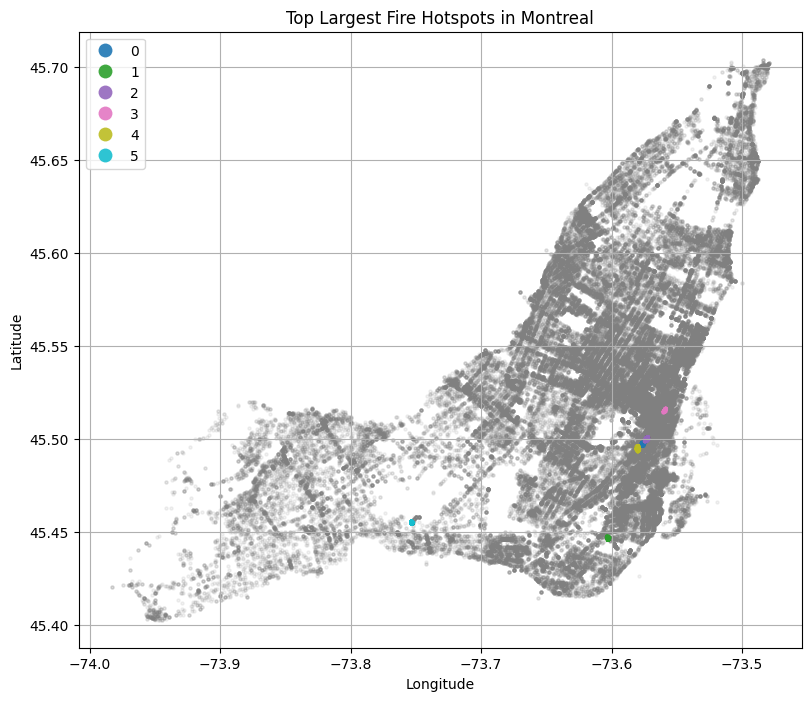


(None, cluster
4    157
2    155
3    123
1    107
0    104
5    101
Name: count, dtype: int64)

In [10]:
# Plotting the top clusters
fig, ax = plt.subplots(figsize=(10, 8))
# Plot all points with very low opacity
geo_fires.plot(ax=ax, markersize=5, color='grey', alpha=0.1)
# Plot top clusters with distinct colors and higher opacity
top_cluster_data.plot(ax=ax, markersize=5, column='cluster', categorical=True, legend=True, alpha=0.9)
ax.set_title('Top Largest Fire Hotspots in Montreal')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True)
plt.show(), cluster_sizes.head(10)

In [23]:
df_incidents.loc[:,'IS_FIRE'] = df_incidents['INCIDENT_CATEGORY'].isin(['Autres incendies', 'Incendies de bâtiments'])
df_incidents.head()

,FIRE_STATION_ID,CREATION_DATE,INCIDENT_CATEGORY,AREA_ID,INCIDENT_NBR,INCIDENT_TYPE,LATITUDE,LONGITUDE,UNITS,AREA,CREATION_TIME,IS_FIRE
0,18,2005-01-01,Sans incendie,21,1,Inondation,45.620274,-73.619956,1,Montréal-Nord,00:03:47,False
1,10,2005-01-01,Alarmes-incendies,18,2,Alarme privé ou locale,45.494087,-73.582587,7,Ville-Marie / Parc Jean-Drapeau / Centre-Sud,00:03:56,False
2,72,2005-01-01,Alarmes-incendies,13,3,Alarme privé ou locale,45.484406,-73.693038,6,St-Laurent,00:03:57,False
3,13,2005-01-01,Sans incendie,23,4,Inondation,45.541383,-73.545944,1,Mercier / Hochelaga-Maisonneuve,00:05:01,False
4,18,2005-01-01,Sans incendie,21,5,Inondation,45.611304,-73.632440,1,Montréal-Nord,00:06:20,False


In [24]:
def extract_sample(df, sample_size):
    # Calculate the fraction of the data to sample
    fraction = sample_size / len(df)

    # Extract a representative sample
    sample = df.sample(frac=fraction, random_state=42)  # Setting random_state for reproducibility

    return sample

In [25]:
sample_size = 1000
df_fires_sample = extract_sample(df_fires, sample_size)
df_fires_sample.head()

,FIRE_STATION_ID,CREATION_DATE,INCIDENT_CATEGORY,AREA_ID,INCIDENT_NBR,INCIDENT_TYPE,LATITUDE,LONGITUDE,UNITS,AREA,CREATION_TIME,grid_lat,grid_long
91202,21,2006-10-28,Incendies de bâtiments,20,41670,10-22 avec feu,45.585401,-73.585765,6,St-Léonard,08:52:26,45.5850,-73.5885
486037,30,2011-05-08,Autres incendies,11,40257,Feu de champ *,45.524280,-73.591696,1,Plateau Mont-Royal,01:24:08,45.5220,-73.5930
828290,30,2014-04-28,Autres incendies,11,39933,Déchets en feu,45.507573,-73.575327,1,Plateau Mont-Royal,03:12:14,45.5040,-73.5795
639270,34,2012-09-11,Autres incendies,9,83970,Feu de véhicule extérieur,45.478958,-73.626044,1,Côte-des-Neiges / Notre-Dame-de-Grâce,14:14:31,45.4770,-73.6290
1130039,18,2016-04-24,Autres incendies,8,39828,Feu de champ *,45.602977,-73.614466,1,Montréal-Nord,15:06:39,45.5985,-73.6155


In [37]:
#df_fires_sample.to_csv('C://Users//carga//Downloads//fires_sample.csv', index=False)

In [6]:
#df_incidents.to_csv('C://Users//carga//Downloads//incidents.csv', index=False)

In [26]:
sample_size = 1000
df_incidents_sample = extract_sample(df_incidents, sample_size)
df_incidents_sample.head()

,FIRE_STATION_ID,CREATION_DATE,INCIDENT_CATEGORY,AREA_ID,INCIDENT_NBR,INCIDENT_TYPE,LATITUDE,LONGITUDE,UNITS,AREA,CREATION_TIME,IS_FIRE
1672613,30,2016-11-08,Alarmes-incendies,7,112581,Alarme privé ou locale,45.522897,-73.601583,2,Le Plateau-Mont-Royal,13:22:31,False
243636,30,2009-02-10,Premier répondant,22,10844,Premier répondant,45.527850,-73.594877,2,Plateau Mont-Royal,08:41:12,False
786844,40,2013-12-19,Premier répondant,12,119063,Premier répondant,45.607720,-73.523474,1,Mercier / Hochelaga-Maisonneuve,22:14:06,False
150817,57,2007-12-14,Premier répondant,11,51397,Premier répondant,45.484558,-73.852494,1,Pierrefonds / Roxboro,12:08:59,False
268689,48,2009-05-19,Premier répondant,23,37096,Premier répondant,45.550050,-73.549577,2,Mercier / Hochelaga-Maisonneuve,13:05:20,False


In [27]:
#df_incidents_sample.to_csv('C://Users//carga//Downloads//incidents_sample.csv', index=False)

In [8]:
# Define the grid size in degrees (approximately 500 meters at Montreal's latitude)
# Approximate conversion factor at 45 degrees latitude: 1 degree of latitude = 111 km
# 500 meters is about 0.0045 degrees
grid_size = 0.0045

# Compute grid coordinates for each incident
df_fires.loc[:,'grid_lat'] = np.floor(df_fires['LATITUDE'] / grid_size) * grid_size
df_fires.loc[:,'grid_long'] = np.floor(df_fires['LONGITUDE'] / grid_size) * grid_size

# Group data by grid coordinates to count the number of incidents per grid cell
grid_fire_counts = df_fires.groupby(['grid_lat', 'grid_long']).size().reset_index(name='count')

# Check the result of grouping and the top 10 hotspots by fire count
grid_fire_counts.sort_values('count', ascending=False).head(10), grid_fire_counts.describe()



(
          grid_lat  grid_long  count
1553   45.5130   -73.5615    362
1263   45.4950   -73.5795    359
1182   45.4905   -73.5840    306
1491   45.5085   -73.5660    258
1607   45.5175   -73.5570    256
1341   45.4995   -73.5750    250
1264   45.4950   -73.5750    237
1552   45.5130   -73.5660    234
1864   45.5445   -73.5390    233
1649   45.5220   -73.5840    232,
              grid_lat    grid_long        count
count  2637.000000  2637.000000  2637.000000
mean     45.514718   -73.676688    34.075465
std       0.068595     0.122154    38.559061
min      45.400500   -73.984500     1.000000
25%      45.459000   -73.768500     9.000000
50%      45.499500   -73.642500    21.000000
75%      45.562500   -73.579500    46.000000
max      45.702000   -73.480500   362.000000
)

In [19]:
# Create a map centered around Montreal
map_montreal = folium.Map(location=[45.5017, -73.5673], zoom_start=12)

# Create a HeatMap layer and add it to the map
heatmap = HeatMap(df_fires[['LATITUDE', 'LONGITUDE']].values, radius=15)
map_montreal.add_child(heatmap)

# Display the map
#map_montreal.save('Montreal_HeatMap.html')
map_montreal

<folium.folium.Map object at 0x000001E71478AEB0>

In [14]:
df_incidents.describe()

,FIRE_STATION_ID,AREA_ID,INCIDENT_NBR,LATITUDE,LONGITUDE,UNITS,INCIDENT_ID
count,1.924401e+06,1.924401e+06,1.924401e+06,1.924401e+06,1.924401e+06,1.924401e+06,1.924401e+06
mean,3.820993e+01,7.899142e+00,5.710514e+04,4.552548e+01,-7.362425e+01,1.962693e+00,9.744627e+05
std,2.065342e+01,5.789410e+00,3.558505e+04,5.675999e-02,8.492990e-02,2.323275e+00,5.693997e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,4.539625e+01,-7.398944e+01,0.000000e+00,0.000000e+00
25%,2.000000e+01,4.000000e+00,2.669500e+04,4.548577e+01,-7.364858e+01,1.000000e+00,4.811010e+05
50%,3.700000e+01,6.000000e+00,5.377500e+04,4.552084e+01,-7.360487e+01,1.000000e+00,9.640290e+05
75%,5.500000e+01,1.000000e+01,8.618000e+04,4.556088e+01,-7.356942e+01,2.000000e+00,1.467801e+06
max,7.900000e+01,2.500000e+01,5.001270e+05,4.570366e+01,-7.347926e+01,2.750000e+02,1.971909e+06


In [7]:
gdf_incidents = gpd.GeoDataFrame(df_incidents, geometry=gpd.points_from_xy(df_incidents.LONGITUDE, df_incidents.LATITUDE))

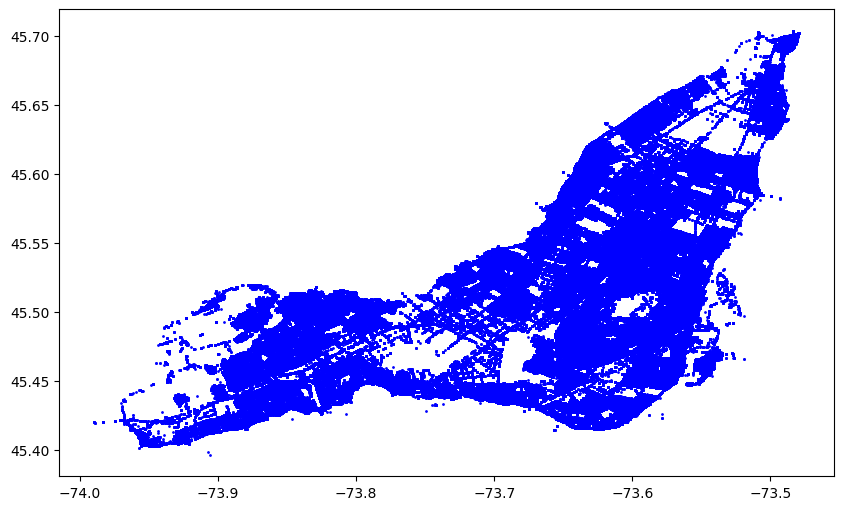

In [8]:
# Plot the result
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_incidents.plot(ax=ax, color='blue', markersize=1, marker='o')
plt.show()

In [10]:
duplicates = df_incidents[df_incidents.duplicated(subset=['INCIDENT_NBR'], keep='first')]
print(duplicates)

         FIRE_STATION_ID CREATION_DATE            INCIDENT_CATEGORY  AREA_ID  \
50265                 25    2006-01-01            Alarmes-incendies       18   
50266                 31    2006-01-01                Sans incendie       22   
50267                 30    2006-01-01            Alarmes-incendies       22   
50268                 65    2006-01-01  Fausses alertes/annulations       14   
50269                  5    2006-01-01                Sans incendie       18   
...                  ...           ...                          ...      ...   
1924396               55    2022-05-31             Autres incendies        1   
1924397                4    2023-06-19            Premier répondant        3   
1924398               73    2023-03-15                Sans incendie        3   
1924399                4    2023-06-26            Premier répondant        3   
1924400               73    2023-04-23            Premier répondant        3   

         INCIDENT_NBR                  